# Решение задачи X.8.9 от Неварко Александра.
Дифференциальное уравнение второго порядка сведено
к системе двух уравнений первого порядка.<br>
Далее был использован неявный метод Эйлера.<br>
__(y[n+1] - y[n])/dt = f(x[n+1], y[n+1])__.<br>
График решения становится устойчивым уже при N = 1000.<br>
Значение тока в конце осцилирует, устанавливается примерно при N > 17000.

Enter N > 2: 17000
i(t = 0.1) = -0.016041976201651577
A:
[[ 9.99994466e-01  5.87920787e-06]
 [-9.40673259e-01  9.99406546e-01]]
B:
[[8.30054643e-10]
 [1.41100989e-04]]


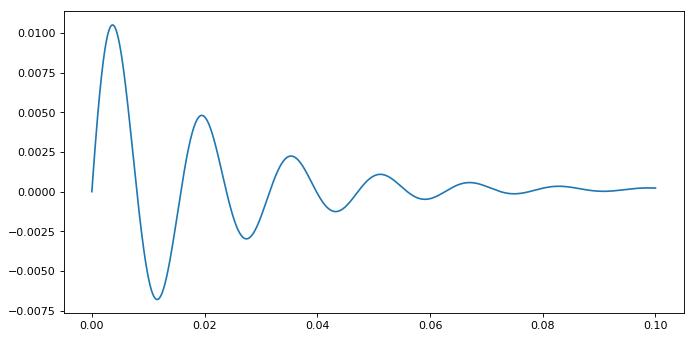

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Block of constants
E = 24  # Volts
R = 100  # Om
L = 1  # Henri
C = 6.25e-6  # Farad
T = 0.1  # Seconds

# Block of starting values
Q0 = 0
P0 = 5

# Input the grid parameter
N = int(input('Enter N > 2: ').strip())
dt = T / (N-1)
t = np.linspace(0, T, N)
q, p = np.zeros(N), np.zeros(N)
q[0] = Q0
p[0] = P0

#Block of coefs
denom = 1/(L*C) + R/(L*dt) + 1/(dt*dt)
a11 = (1/(dt*dt) + R/(L*dt)) / denom
a12 = 1 / (dt * denom)
a21 = -1 / (L*C*dt*denom)
a22 = 1 / (dt*dt*denom)
b1 = E / (L * denom)
b2 = E / (L*dt * denom)
A = np.array([[a11, a12],
              [a21, a22]])
B = np.array([[b1], [b2]])

#Stepping function
for n in range(1, N):
    q[n] = q[n-1]*a11 + p[n-1]*a12 + b1
    p[n] = q[n-1]*a21 + p[n-1]*a22 + b2

#Output
print('i(t = 0.1) =', p[-1])
print('A:', A, 'B:', B, sep = '\n')
plt.figure(dpi = 80, figsize = (10, 5))
plt.plot(t, q)
